<a href="https://colab.research.google.com/github/Dayn9/LearnTensorFlow/blob/master/CatOrDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = train_dir,
                                                          shuffle = True, # rearrange the images
                                                          target_size = (IMG_SHAPE, IMG_SHAPE), #resize the images
                                                          class_mode = 'binary') # binary Dog (0) or Cat (1)

val_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = validation_dir,
                                                          shuffle = False,
                                                          target_size = (IMG_SHAPE, IMG_SHAPE),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


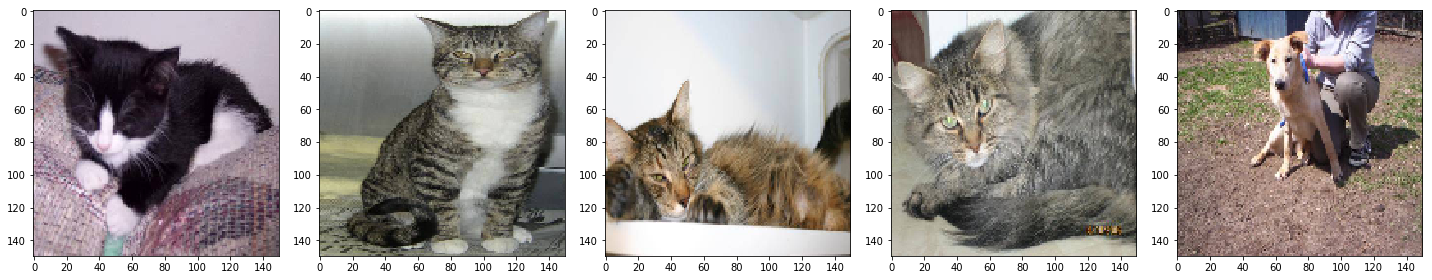

In [8]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,
                          (3,3),
                          activation = 'relu', 
                          input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64,
                          (3,3),
                          activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128,
                          (3,3),
                          activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128,
                          (3,3),
                          activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,
                         activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
EPOCHS = 100
history = model.fit_generator(train_data_gen,
                             steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
                             epochs = EPOCHS,
                             validation_data = val_data_gen,
                             validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))))

Epoch 1/100
20/20 [==============================] - 13s 628ms/step - loss: 0.7261 - acc: 0.5065 - val_loss: 0.6906 - val_acc: 0.5190
Epoch 2/100
20/20 [==============================] - 8s 376ms/step - loss: 0.6855 - acc: 0.5440 - val_loss: 0.6815 - val_acc: 0.5080
Epoch 3/100
20/20 [==============================] - 8s 414ms/step - loss: 0.6829 - acc: 0.5510 - val_loss: 0.6609 - val_acc: 0.5990
Epoch 4/100
20/20 [==============================] - 8s 401ms/step - loss: 0.6796 - acc: 0.5615 - val_loss: 0.6706 - val_acc: 0.6310
Epoch 5/100
20/20 [==============================] - 8s 377ms/step - loss: 0.6497 - acc: 0.6055 - val_loss: 0.6235 - val_acc: 0.6440
Epoch 6/100
20/20 [==============================] - 8s 380ms/step - loss: 0.6346 - acc: 0.6325 - val_loss: 0.6137 - val_acc: 0.6610
Epoch 7/100
20/20 [==============================] - 8s 378ms/step - loss: 0.5890 - acc: 0.6890 - val_loss: 0.6087 - val_acc: 0.6670
Epoch 8/100
20/20 [==============================] - 7s 365ms/step -

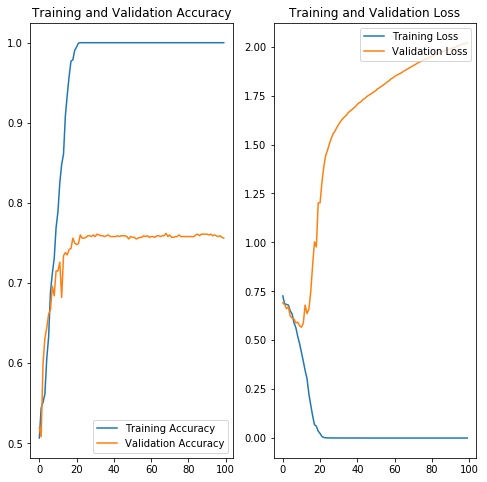

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()